# 06 Support Vector Machines

Welcome to the 6th Practical Session on Machine Learning. In this lab, we'll be learning about **Support Vector Machines**. This lab session is a fairly short session, so it may be more enjoyable to study. Support Vector Machines, or SVMs for short, were considered a very strong system for classication, and even regression in the 1990s. At that time, People did not believe in the systems that we use today, like the Neural Networks or Random Forests, so SVMs were pretty much State of the Art. In the early 1990s, there was almost no practical evidence that Neural Networks could perform better than SVMs. But that was obviously when Neural Networks were really shallow (there was no *Deep* Learning), and now we know for sure that Neural Networks are far more sophisticated, complex are well performing, than SVMs. But, SVMs are still an integral part of Machine Learning - SVMs can literally be approximated as other techniques such as Linear Regression or Logistic Regression.

Ideally, Support Vector Machines has a lot of complicated Math and Theory. According to many, the math behind just the working of the Support Vector Machines is even more complex than Neural Networks. So, in the spirit of the practicality that we always try to pursue in these Lab Sessions, instead of the math and theory, we will not go deep into theory, but learn how to run SVM models in practice. You only need a basic understanding cum overview of the working of SVMs to be able to run SMVs. To be honest, you will mostly never need the theory (unless you decide to research upon it). And we'll leave the theory of it to your Lecture Classes. 

**So what are SVMs in the first place?**

## What are Support Vector Machines

Lets start with a simple binary classification example. Our job is to create a model that separates the two. In Logistic regression, we modelled a line, that gave a value either greater than 0 or less than 0 (and hence an output of less than 0.5 or more than 0.5 when passed through a sigmoid function), based on which category the datapoint lies in. Something like the figure below:
<figure><center>
<img src='https://drive.google.com/uc?id=1QIdMc91Vj9aBRiDqqxv595bD296c0WBT' width='50%'></center></figure>

This is all that we did in Logistic Regression - model a line 

(*or a plane to be more precise - A line is basically a 1-dimensional version of a 2D plane, and separates 2-D data. A 2D plane separates 3-D data, and similarly there can be N-dimensional planes as well, to separate N+1 dimensional data*) 

that best separates the two categories of data. Basic Geometry tells us that if you model a line(or plane) $f(x) = 0$, and then give it an input x that does *not* lie on the line, you will get a non-zero value ($f(x) \neq 0$). If you input a value that lies on one side of the line, you will get a positive value, and if you input a value that is on the other side, you will get a negative value. So it makes sense to build a line that lies in the middle of the two clusters of data. Ofcourse its not always possible to always get 100% accuracy, because of the distribution of data. But our focus is to get the best possible results. 

SVMs simply do the same, except that SVMs take it to the next level. SVMs not only try to get the best results, but also the best fitting line, even if the accuracy might not increase per se. What do we mean by the *best fitting line*?

<figure><center>
<img src='https://drive.google.com/uc?id=1_oi7kIlVu25f9UNf5RWYNxEC_XwtvNyj' width='50%'></center></figure>
 
In the figure given above, all the three lines ($L1$,$L2$ and $L3$) would ideally give 100% accuracy in this binary classification problem, since they clearly separate the two classes. But Imagine what would happen if you get new datapoints around the existing clusters. Lines $L1$ and $L3$ are so closely cutting one of the categories, that there's a much higher chance of misclassification when new data would be introduced. Line $L2$ seems much more robust in that view. 

Mathematically, whats going on, is that Line $L2$ has the best *Margin of Separation*. Meaning, its the most far away from any datapoint . This creates room for variance in data. Even if you introduce new data that is slightly out of the already-existing clusters, the line with the most margin (Line L2) is still more likely to correctly separate the categories. This is what the *Margin of Separation* looks like:

<figure><center>
<img src='https://drive.google.com/uc?id=1FssE45toMSUcZPgMXGIhK7xUmhrhyZeR' width='50%'></center></figure>

The space in between the two dotted lines is the margin of separation. There *ideally* should be no data in between these two lines. The actual separating (classifying) line is in the between the two dotted lines. 

A logistic regression model would not know the difference between the lines $L1$,$L2$ and $L3$. SVM does! SVM not only tries to minimize the error in prediction, but also tries to *maximize the margin between the two categories*.

So our data in N Dimensional, there is *SOME* N-dimensional plane that *Best* separates the data, with the widest margin of separation. The remaining idea is the same - build a model, build a cost function that you wish to minimize in order to get the best results, and build an optimization method that changes the position of the line/plane such that the cost function is minimized.

Basically, 

1. Step1:

 Model a line that can separate the data. Say $y=w_1 x_1 + w_2x_2 + .... $

2. Step2:
 
 Create a loss function. This loss function not only accounts for error in prediction (which we've already done in the Logistic Regression Lab , which isn't important to remember letter-by-letter as of now!) as well as the margin. And we need to minimize the loss function. But if you remember, we wanted to *maximize* the separation. That's no problem, simply take the inverse of the term. Maximizing a term is the same as minimizing its mathematical inverse! 

 $Minimize: Loss = BinaryLossOfPrediction + \frac{1}{Margin of Separation}$ 

3. Step3:

 Optimize the line/plane by minimizing the Loss function. How do we minimize the loss function? You can use the technique that we already know - Gradient Descent. Or you can even use a direct formula based approach as we saw earlier. 

That is all of SVM in theory - atleast the theory that we need to understand the basic intuition behind SVM. The above approach applies to classification, but regression is possible too! The approach is the same. Build a model, build a loss function, and build an optimizer! Ofcourse there's no Margin of Separation concept in regression, so we simply have to build a Linear Model.



We won't implement all these details by ourselves. Fortunately, there are libraries that do this for us. We'll be using SciKitLearn's SVM implementation to carry out the task. This is a wonderful point to talk about SKLearn (SciKitLearn)(also called SKL, for short). 

SKLearn is a wonderful Machine Learning Library, containing tools to build almost all fundamental Models - including Linear Regression, Logistic Regression, PCA, even Neural Networks. The only issue is, that there is only so much flexibility that it provides. So, either ways, its a great library to build basic implementations of models. If you however, wish to build more complex functionalities, this is where more sophisticated libraries come into picture. 

The limitations in the functionalities of SKLearn are mostly because of obsolete code structures. If you go into the source code of SKLearn, at some point, it assumes the inputs to functions to be of a very specific type, representing only specific types of information. 

## Building an SVM Model
Let us build an Classification model using SVMs. We've looked at many Image Classification models, but haven't built NLP (Language) Models. So Let us explore a language model, just for fun!

In this lab, we'll be learning to build a Movie Review Classification System. We have some reviews from actual people over actual movies from IMDB's website, and our model will classify which review are positive reviews, and which are negative reviews! 

To help you appreciate the problem - a model that can identify whether the sentiment behind a piece of text is positive or negative, needs to *understand* meanings of words. Consider a positive statement, such as "*I Loved this movie!*". As humans, we look for keywords, like *Love* or *Hate* or *liked* or *(did) Not (like)*, to identify the sentiment. Our model would need to identify how to separate such words. First of all, it would need to find a method to represent words in space. Then it would need to find a model (like a linear model), that separates the two concepts (positive and negative).  

> Side Note: One of the objectives of these Lab Sessions is not just to learn to learn how models work, but also to explore different problems. Many a times, you will have to deal with data that are of different types - the data can be images, videos, texts, audios, graphs, etc. As Data practitioners, its our job to learn how to handle all these different types of data, and convert them into data that the computer can understand (into numbers, that is ). For example, Computers cannot understand Images, but it can understand tensors, or matrices. We will now look at methods to represent text in terms of numbers that our model may understand.


The IMDB dataset is available [here](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews). Since it is a kaggle dataset, we would need to upload a *kaggle.json* file. Run the Cell below to do that!




In [1]:
#run only once per session
%cd 
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!mkdir imdb 
!unzip imdb-dataset-of-50k-movie-reviews.zip -d imdb
% cd imdb
!ls

/root


Saving kaggle.json to kaggle.json
 51% 13.0M/25.7M [00:00<00:00, 130MB/s]
100% 25.7M/25.7M [00:00<00:00, 164MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: imdb/IMDB Dataset.csv   
/root/imdb
'IMDB Dataset.csv'


As you can see, we have a csv file, so we will import the pandas library to read it as a dataframe. According to the dataset's webpage, there are 50000 reviews along with the sentiments of whether they are positive or negative reviews.

In [2]:
import pandas as pd
imdb_dataset=pd.read_csv('IMDB Dataset.csv')

In [3]:
imdb_dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


The `imdb_dataset` dataframe contains two columns - `review`, which contains the review themselves, and the `sentiment`, which contain labels. Lets look at one of the reviews.

In [4]:
sentence=imdb_dataset.iloc[0]
print(sentence.sentiment) #tells us which type of review it is (positive of negative)
sentence.review

positive


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

Let us also find out how many positive and negative reviews are there in the dataset. Ideally, we would want our dataset to be well balanced - meaning, the number of positives should be more or less equal to the negatives. Otherwise, there is a chance of the model being biased towards the more dominating category. Also the accuracy metric does not perform as well on unbalanced categories.  

In [5]:
imdb_dataset['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Thankfully, this dataset contains equal numbers of positives and negatives. 

The next job is to split our dataset into the training and validation dataset. If we have no validation dataset, there is no way to know how well the model performs at the end. We've defined a function to do so. It randomly picks `frac` fraction of data into the training dataset, and the remaining go to the validation dataset. 

Note: Here, we will only use a total of 1000 data points in total. This is because, if you go to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) of SVM Classifier by SKLearn, it says that the time required to optimize the model is dependent on the number of datapoints, by a quadratic factor. So as the number of datapoints increase, the model fitting time increases. Beyond a point, it becomes practically infeasible.  

In [6]:
def split_dataset(df,frac=0.8):
    train=df.sample(frac=frac) #random state is a seed value
    test=df.drop(train.index)
    return train,test

train,test=split_dataset(imdb_dataset.iloc[:1000])
len(train),len(test)

(800, 200)

Hopefully in our small subset, the number of positives and negatives are nearly balanced. (A little off than perfectly balanced is okay!)

In [7]:
train['sentiment'].value_counts()

negative    401
positive    399
Name: sentiment, dtype: int64

Now that we are done setting up our data, we need to find a way to represent words from our data in a way that our model can understand. The simplest way, is to create *vectors*, one dimensional arrays(or tensors), each element represents a word. If in a sentence, the word occurs, put a 1 in that place, and if that word doesn't occur in the sentence, put a 0 in that place. This is called a *hot encoding vector*. In SkLearn, this is called a `CountVector`.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
train_vectors = vectorizer.fit_transform(train['review']) # transform the text to countVectors using the information in the training dataset
test_vectors = vectorizer.transform(test['review']) #just like the training dataset, we also need to convert the text in the testing set into vectors. 

Note, `vectorizer` is simply a python class, with methods such as `fit_transform`, which takes in the training dataset, and based on the words present in it, creates a vocabulary of words, and a sample vector, where each element represents a word. 

Then once the vocabulary has been built, we create vectors for the testing dataset as well.

You can see below, that there are a total of about 16000 unique words in the training dataset.

Next, build the model! You can go to the documentation to see an example of how the model works. We will follow the same method.

In [9]:
len(vectorizer.vocabulary_.keys()),vectorizer.vocabulary_.keys()

(15709,
 dict_keys(['crossfire', 'remains', 'one', 'of', 'the', 'best', 'hollywood', 'message', 'movies', 'because', 'unlike', 'admirably', 'intentioned', 'gentleman', 'agreement', 'which', 'it', 'beat', 'to', 'theatres', 'by', 'few', 'months', 'chooses', 'send', 'its', 'via', 'form', 'an', 'excellent', 'noir', 'thriller', 'rather', 'than', 'have', 'outraged', 'star', 'constantly', 'saying', 'jewish', 'isn', 'much', 'easier', 'get', 'that', 'hate', 'is', 'like', 'loaded', 'gun', 'across', 'when', 'dead', 'bodies', 'are', 'actual', 'metaphorical', 'somewhat', 'shamefully', 'brief', 'featurette', 'on', 'warners', 'dvd', 'doesn', 'mention', 'novelist', 'richard', 'brooks', 'disowned', 'film', 'over', 'shift', 'from', 'homophobic', 'murder', 'anti', 'semitic', 'but', 'interesting', 'note', 'while', 'victim', 'killed', 'primarily', 'he', 'there', 'little', 'doubt', 'in', 'sam', 'levene', 'performance', 'character', 'fact', 'also', 'gay', 'not', 'mincing', 'caricature', 'definitely', 'two', 

Here's what a single vector looks like

In [10]:
train_vectors.toarray()[0], sum(train_vectors.toarray()[0])
#sum shows us how many words are 1's - meaning the corresponding document had a total of those many words 

(array([0, 0, 0, ..., 0, 0, 0]), 408)

In [11]:
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear') # a python class that optimizes the model using a Linear line(plane)
%time classifier_linear.fit(train_vectors, train['sentiment'])

CPU times: user 900 ms, sys: 3.18 ms, total: 903 ms
Wall time: 908 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The above peice of code may be confusing. Let us break this down.

Sklearn provides a module called `svm`, which contains a classifier called as `SVC` (Support Vector Classification) (Remember, there is Support Vector Regression as well). 

`svm.SVC` takes a parameter called kernel. It basically means, what is the nature of our model. We use a linear model as of now (as we did in Logistic Regression as well). The possible values, according to the documentaion are: `kernel{â€˜linearâ€™, â€˜polyâ€™, â€˜rbfâ€™, â€˜sigmoidâ€™, â€˜precomputedâ€™}, default=â€™rbfâ€™`

Poly - fits a polynomial function instead of a linear function to the data. (Like we did in the Linear Regression Lab - We tried to fit a cubic function to the data)

Sigmoid tries to fit a sigmoid function to the data. 

Radial Basis function fits circles rather than straight lines. Basically, find some n-dimensional radius, which creates an n-dimensional sphere, which separates the two classes. 

<figure><center>
<img src='https://drive.google.com/uc?id=1ocGq80WdPRQ-oaG4f1F5e-2bpqdHbonK
' width='50%'></center></figure>

However, the circle/sphere is N-Dimensional and not 2/3 dimensional. 

The last one is Precomputed, meaning, we use a custom function, and give it precomputed outputs, so it doesnt have to do manual computing. We don't use this in our lab!

Apparantly, research shows that this radial function outperforms all types of kernels. 

For now, we will use the Linear Model.

Next, we will obtain predictions on the testing dataset, so we can see how many our model gets correctly. So the `predict` method of the classifier gives us predictions. 

SKlearn also provides a function called `classification_report` which takes in the predictions along with the ground truth (`test['sentiment']` in this case) and gives us a report of the predictions telling us about the performance.

In [12]:
prediction_linear = classifier_linear.predict(test_vectors)
report = classification_report(test['sentiment'], prediction_linear, output_dict=True)
report

{'accuracy': 0.815,
 'macro avg': {'f1-score': 0.8149583656322672,
  'precision': 0.8149314931493149,
  'recall': 0.8150260104041617,
  'support': 200},
 'negative': {'f1-score': 0.8121827411167513,
  'precision': 0.8080808080808081,
  'recall': 0.8163265306122449,
  'support': 98},
 'positive': {'f1-score': 0.8177339901477833,
  'precision': 0.8217821782178217,
  'recall': 0.8137254901960784,
  'support': 102},
 'weighted avg': {'f1-score': 0.8150138781225776,
  'precision': 0.8150685068506851,
  'recall': 0.815,
  'support': 200}}

So, `report` contains many metrics, such as `accuracy`, `precision`, `recall` etc. Precision and Recall are useful metrics when the dataset is imbalanced in terms of categories. But since we verified that our data is well balanced, accuracy will suffice

In [13]:
report['accuracy']

0.815

So we have successfully built a Movie Review Classifier. Congratulations.

Next, just for the sake of completion, we will try to improve our model. This has nothing to do with SVMs, but rather with the NLP part of the model, meaning, we will try to better represent the data. You can keep this in mind for whenever you build language models - its a wonderful trick to improve information representation of the data. 

Instead of the CountVectors, we use a representation technique called as *Term Frequency - Inverse Frequency Document Frequency*. If you wish to read the theory behind it, you can find some [here](https://radiant-brushlands-42789.herokuapp.com/towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76). 

The essence is that, instead of putting 1's in place of words that occur in a document, TF-IDF puts a fraction, which represents how heavily/frequently a word is present in a document. But at the same time, if a word is found in both categories frequently (like, extremely common words like "is", "the", "a"), those words do not help us differentiate between the two documents. So TF-IDF makes sure that less weightage is given to words that are very common. But more weightage to words that occur only in one category. So obviously this will help us in easily differentiating between the two categories.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 5,max_df = 0.8, sublinear_tf = True, use_idf = True)

The syntax of this TFIDF vectorizer is simply picked up from the documentations. At this point, we only want to see it work, so its not important to understand the parameters of the function above.

So this vectorizer class has the same structure as the vectorizer above, and so the next steps remain the same. 

In [15]:
#convert training and testing data into TF-IDF vectors
train_vectors = vectorizer.fit_transform(train['review'])
test_vectors = vectorizer.transform(test['review'])

In [16]:
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, train['sentiment'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
prediction_linear = classifier_linear.predict(test_vectors)

In [18]:
report = classification_report(test['sentiment'], prediction_linear, output_dict=True)
report['accuracy']

0.825

You can see that the model has increased in accuracy!

So thats it! You have your own Movie Review Classifier. Let us actually see it working for ourselves. Below, we've written two sentences, which we wish to see whether the model thinks of it as a positive or a negative review!

In [19]:
review = f'Absolutely loved the movie!'
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

['positive']


In [20]:
review = f'What a waste of money! I wish I could get a refund'
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

['negative']


In [21]:
review = f'Worse than Batman but better than Arkham'
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

['negative']


Try it out for yourself! Enter a sentence and find out what the model thinks of it!

# Review and Questionnaire

In this lab, we learnt of classification/regression system, that takes the traditional linear/logistic regression models to the next level, by not only finding the best results, but also the best fit model. We build an NLP model using this system, and also learnt about some techniques in NLP to represent textual information in the needed format. 

In the end, any classification or regression problem can be solved by any suitable model, like the SVM, if the information is correctly represented. This comes from experience, so whats more important right now is to simply keep these concepts in mind. As and when you start coming across these topics more, you will learn the depths too.

### Questionnaire:
These are non-evaluative, but highly recommended to go through. Make sure you clearly know the answer to each of these concepts.

1. What are Kernels in SVM? What are the different types of kernels in SVM?
2. Describe the two representation techniques we studied about text. 
3. SVMs uses a layered class approach - meaning there are multiple steps involved in a model, each of which has a state, contained in the form of a python class. In this example, what was the structuring of our code? What was the heirarchy of classes used?

# Whats Next in these Lab Sessions?

We have officially the half-way checkpoint of these Lab Sessions (as well as this course). Upto Now, we've covered all the basics and fundamentals of Machine Learning. Now its time for us to move to the modern era of Machine Learning. So for the remaining Labs, we'll look at progressively modern and progressively important concepts in Machine Learning. We'll be transitioning towards Deep Learning slowly, which is THE field that dominates the present state of Machine Learning. We'll also be learning Decision Trees and Random Forests, and even Reinforcement Learnings, which have their own interesting applications. So you'll definitely enjoy it. 

A gentle suggestion from our end. Please do attempt these labs, even if you feel intimidated to attempt the exercises. As you might have realized, most of our labs are fun exercises. Many evaluative exercises are simply meant for you to enjoy and explore. There's no wrong answers, and you are almost never evaluated based on how well your model performs. 

You also don't need to know a lot of theory to attempt these labs. So if you feel you're lagging behind in theory classes, you can still attempt the labs, since we never focus on theory, but only practical techniques in these labs. So, if you really do wish to be an effective Data practitioner, these labs are guaranteed to help you, that is Our assurance to you.

If you feel you don't know enough coding to attempt these labs, we always encourage Google Searches. THis is not an exam, and these labs are meant to reflect what you will come across in the real world. You will almost Always have internet, so why not learn coding that way? So, feel free to search your queries up. As we mentioned before in one of the labs, the ability to know what and how to search for how to code is far more important than knowing coding itself. 

You don't even need to build advanced code structures. We mostly provide you with code structures and directions. So through this, you not only feel less burdened, but also learn how to approach problems through code. 

Even if you don't wish a lab be evaluated, we recommend you still run the notebook once. Who knows, you may come across a very interesting problem, that you had always wished to know about, and now you would finally be able to build it yourself. We're gonna do a lot of wonderful applications in the future. (Far more interesting than the ones we've already done).

#Exercise (Evluative)
In this exercise, we'll try to apply SVM Classification to a different data type - something that we are already aware with - Visual Data. To be more precise, we'll be working with Images, and we'll be trying to perform binary classification. 

We'll be trying to identify the emotions of people by looking at their pictures. Humans are pretty efficient in doing so. We now build a machine model that can do so!

Lets us download the dataset

In [22]:
%cd
!kaggle datasets download -d msambare/fer2013
!mkdir facial_expressions
!unzip fer2013.zip -d facial_expressions
% cd facial_expressions
!ls

Streaming output truncated to the last 5000 lines.
  inflating: facial_expressions/train/sad/Training_65275626.jpg  
  inflating: facial_expressions/train/sad/Training_6529266.jpg  
  inflating: facial_expressions/train/sad/Training_65329617.jpg  
  inflating: facial_expressions/train/sad/Training_65338712.jpg  
  inflating: facial_expressions/train/sad/Training_65338797.jpg  
  inflating: facial_expressions/train/sad/Training_65387162.jpg  
  inflating: facial_expressions/train/sad/Training_65404494.jpg  
  inflating: facial_expressions/train/sad/Training_65426218.jpg  
  inflating: facial_expressions/train/sad/Training_65430136.jpg  
  inflating: facial_expressions/train/sad/Training_65437377.jpg  
  inflating: facial_expressions/train/sad/Training_6545735.jpg  
  inflating: facial_expressions/train/sad/Training_65463385.jpg  
  inflating: facial_expressions/train/sad/Training_65473985.jpg  
  inflating: facial_expressions/train/sad/Training_65502829.jpg  
  inflating: facial_express

In our current folder, there are two folders - train and test, each containing jpg images of 48x48 pixels. We'll be accessing each image through their paths, for which we'll use the `Path` module of the `pathlib` library, which is an extremely efficient library to handle paths. And since we'll be using the Pillow Library, which we have used in previous labs as well. It contains the `Image` module, which can handle standard Image formats, including jpg images. 

In [23]:
from pathlib import Path
from PIL import Image

Let us visualize one of the images for you to understand what the data looks like. This Image is from a surprised person!

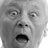

In [24]:
Image.open(Path('train/surprise/Training_99984132.jpg'))

Your job is to build a classifier that differentiates between happy and sad people. You need to choose 1000 pictures of happy people and 1000 pictures of sad people for the training set, and 400 pictures each for the testing dataset. We've provided a function that provides the Paths of these images. This is an important steps, because you will need to access each image separately, and convert it into a format that is understandable by computers - in this cases, 2D arrays (aka matrices). 

To walk through the entire folder, we will use the os folder, which lets us go through each directory and find what we're looking for. 

In [25]:
import os

In [26]:
def return_paths(path=Path('.'),categories=['happy','sad'],items=1000):
    f"""
    This function returns the paths of images in `categories` that lie under the `path` directory, along with their labels. 
    Return `items` number of items per category (or as many are available). Paths returned are pathlib Path objects.
    """
    img_paths=[]
    img_labels=[]
    for r,_,_ in os.walk(path):
        r=Path(r)
        if (r.stem) in categories:
            items_ = items if len(os.listdir(r))>items else len(os.listdir(r))
            for img in os.listdir(r)[:items_]:
                img_paths.append(r/img)
                img_labels.append(r.stem)
    return img_paths,img_labels


In [27]:
train_paths,train_labels=return_paths(Path('train'),items=1000)
valid_paths,valid_labels=return_paths(Path('test'),items=400)

In [28]:
train_paths

[PosixPath('train/sad/Training_76596885.jpg'),
 PosixPath('train/sad/Training_55636125.jpg'),
 PosixPath('train/sad/Training_55871320.jpg'),
 PosixPath('train/sad/Training_64787896.jpg'),
 PosixPath('train/sad/Training_6339943.jpg'),
 PosixPath('train/sad/Training_95210158.jpg'),
 PosixPath('train/sad/Training_63375883.jpg'),
 PosixPath('train/sad/Training_33452599.jpg'),
 PosixPath('train/sad/Training_44476421.jpg'),
 PosixPath('train/sad/Training_43072545.jpg'),
 PosixPath('train/sad/Training_84656862.jpg'),
 PosixPath('train/sad/Training_53031794.jpg'),
 PosixPath('train/sad/Training_5784949.jpg'),
 PosixPath('train/sad/Training_16584441.jpg'),
 PosixPath('train/sad/Training_63200337.jpg'),
 PosixPath('train/sad/Training_47792658.jpg'),
 PosixPath('train/sad/Training_64938109.jpg'),
 PosixPath('train/sad/Training_32643523.jpg'),
 PosixPath('train/sad/Training_12354633.jpg'),
 PosixPath('train/sad/Training_88180415.jpg'),
 PosixPath('train/sad/Training_45080796.jpg'),
 PosixPath('tra

You need to go through all these paths, and first access them using the Image library, then convert them into Numpy arrays.

For each image, you will get a Numpy 2-D Array of shape 48x48. You can simply convert it to a 1-D array of 48 times 48 = 2304 elements, by simply. 

So each image will be represented as a 2304 element array. There are the a total of 2000 Images in the training set, so the Input to the SVM model will be a numpy 2-D array of shape 2000x2304. The target variables will be a Numpy 1-D array of shape 2000. 

You need to iterate through all paths, and open them using Image.open and convert them into numpy arrays. Then the Numpy Array (48x48 pixels in shape) needs to be converted to a 1-D array by using the array.flatten() method. 

Then you'll have a list of 2000 1-D numpy arrays. You need to Google Search to find how to convert a list of 1-D arrays to a single 2-D array. 

You also need to convert the list of labels to a single 1-D array, by googling how to convert a list of elements into a numpy arrays. Do this for the testing dataset as well.

At this point you will have the data ready - the training set 2-D Numpy array of shape 2000x2304 will be similar to `train_vectors` in the text model example above, and similarly you will have `test_vectors` as well.

Instead of `train['sentiment']` and `test['sentiment']` in the language model above, you can directly use the Numpy arrays containing labels. 

Build the SVM Model and find the accuracy over the testing dataset. Use the Radial Basis function kernel ('rbf').

In [47]:
import numpy as np

In [38]:
def imgs_to_nparray(paths):
  images = []
  for path in paths:
    img = Image.open(path)
    images.append(np.asarray(img).flatten())
  images = np.array(images)
  return images

In [43]:
train_array = imgs_to_nparray(train_paths)
test_array = imgs_to_nparray(valid_paths)
train_labels = np.array(train_labels)
test_labels = np.array(valid_labels)

In [61]:
rbf_classifier = svm.SVC(kernel='rbf')
rbf_classifier.fit(train_array, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
prediction_rbf = rbf_classifier.predict(test_array)

In [63]:
report = classification_report(test_labels, prediction_rbf, output_dict=True)
report['accuracy']

0.725